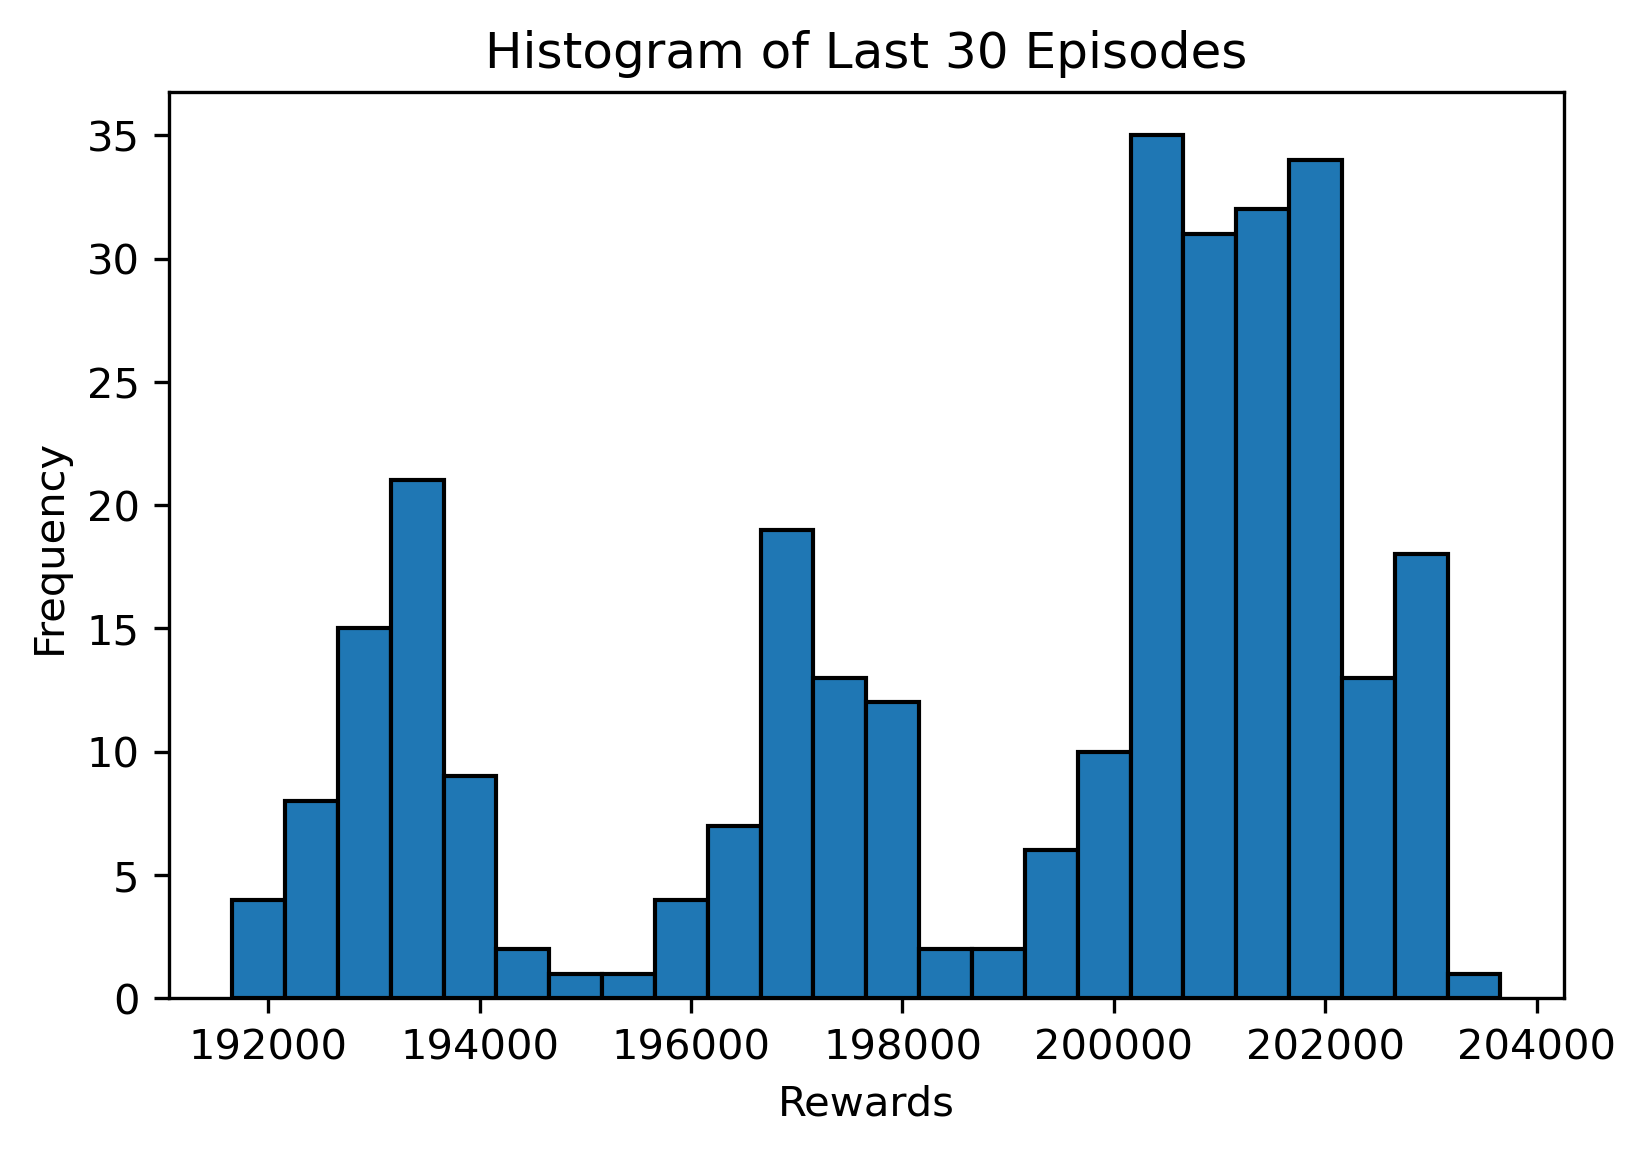

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

# ファイルから最後の30行を取得する関数
def get_last_n_lines(file_name, n):
    df = pd.read_csv(file_name, header=None)
    return df.tail(n)

# すべての数値を保持するリスト
all_values = []

# ファイルのパスを作成
input_folder_path = 'outputs'
output_folder_path = 'results'
file_names = [f'output ({i}).txt' for i in range(1, 11)]

# 各ファイルから最後の30行を取得
for file_name in file_names:
    full_file_path = os.path.join(input_folder_path, file_name)
    last_30_values = get_last_n_lines(full_file_path, 30)
    all_values.extend(last_30_values[0].values)

# リストをソート
all_values.sort()

# 中央値、最頻値、平均値、最小値と最大値の差、標準偏差を計算して保存
median_value = np.median(all_values)
mode_value = stats.mode(all_values)[0][0]
mean_value = np.mean(all_values)
range_value = np.ptp(all_values)
std_dev = np.std(all_values)
with open(os.path.join(output_folder_path, 'output_last30_center.txt'), 'w') as f:
    f.write(f'中央値: {median_value}\n')
    f.write(f'最頻値: {mode_value}\n')
    f.write(f'平均値: {mean_value}\n')
    f.write(f'範囲: {range_value}\n')
    f.write(f'標準偏差: {std_dev}\n')

# ヒストグラムの描画
plt.figure(dpi=300)
plt.hist(all_values, bins=range(min(all_values), max(all_values) + 500, 500), edgecolor='black')

# ラベルとタイトルの追加
plt.xlabel('Rewards')
plt.ylabel('Frequency')
plt.title('Histogram of Last 30 Episodes')

# グラフの保存
plt.savefig(os.path.join(output_folder_path, 'bar_graph_last30.jpg'))
